<a href="https://colab.research.google.com/github/yangyeji2020311166/ML/blob/main/TF_IDF_(Vectorizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-17\"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-upda

In [6]:
f=open('/content/스마트폰 크롤링.txt','r',encoding='utf-8')
txt = f.readlines()
f.close()

txt2=[]          #중복 댓글 제거
for item in txt:
    if item not in txt2:
        txt2.append(item)


print(txt2)

['\t아이디\t댓글 내용\n', '0\t  ITSub잇섭\t"초기불량은 깔끔하게 오늘 교품 받았습니다.다만, 구입하신분들중 힌지를 체크해봐야하는게 이번에는 모두 열고 닫을때 딸깍.. 걸리는 느낌이 납니다. 그린은 정상인데...."\n', '1\t  깔깔깔\tㅋㅋㅋㅋ\n', '2\t  힉스\t교환 ㅊㅊ\n', '3\t  UmJunSick\t탈모\n', '4\t  장카일 JangKyle\tㅋㅋㅋㅋㅋ 왜 자꾸 플립과 작년부터 안좋네... 톰브라운도 그렇고.\n', '5\t  중국 스파이\t어차피 뜯을거 머가 문제인지 확인하는 것도 좋을지도..?\n', '6\t  라범 - IT & Tech\t앗.. 초기불량이라니.. 저런작년부터 왠지 좀..\n', '7\t  땅땅맨\t5:08 불량 내용11:49 근데 테스트한다고 일부로 물에 담궈버리면 교품이 가능한가요?궁굼하네요.아니죠 교품하고 방수테스트하신거죠?\n', '8\t  임동현\t9:23 은근슬쩍 버즈 스포ㅋㅋ\n', '9\t  사람\tㄷㄷ\n', '10\t  성이름\t?@땅땅맨? 테스트한제품을 교품한듯\n', "11\t  Se?oritas Top's\t구매하고 리뷰하는 좋은 점은 단점을 바로 알 수 있다는 점\n", '12\t  핑크퐁의따신손결\t프로필 합격\n', '13\t  동우\t?@짱? 이분 한국 유튜버들 많이 보시고 번역기로 댓글 다시는 분인데 말이 좀 심하시네요\n', '14\t  핑크퐁의따신손결\t나한테 하는거 아님?\n', '15\t  동우\t?@핑크퐁의따신손결? 아닌데요\n', '16\t  핑크퐁의따신손결\t뎃글 안보임\n', '17\t  seonwoo\t?@핑크퐁의따신손결? 맞춤법 부터 k잼민\n', '18\t  동우\t워워 진정\n', '19\t  kitty.\t광고 많이 발전했네 ㅋㅋㅋ\n', '20\t  모욕은비하니까정당화될수없다\t좋은 일 많은 하루 보내십쇼\n', '21\t  제 채널 구독하고 제로투랑 은꼴영상 보세용\t닉뱡ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ!!\n', '22\t  이태성\t진짜

In [7]:
##대댓글 아이디 삭제하기
remove_id_list=[]
for i in range(len(txt2)):
  if '?@' in txt2[i]:
    cnt = 0
    for j in range(len(txt2[i])):
      if (txt2[i][j] == '?' or txt2[i][j] == ' '):
        if (txt2[i][j] == '?'):
          cnt+=1
      elif cnt>=2:
        break
    tmp = txt2[i].split(sep='?',maxsplit=cnt)
    remove_id_list.append(tmp[cnt])
  else:
    remove_id_list.append(txt2[i])


In [9]:
from konlpy.tag import Okt
import konlpy
okt = konlpy.tag.Okt()

for i, document in enumerate(remove_id_list):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] in ['Noun']: #명사
            clean_words.append(word[0])
    remove_id_list[i] = clean_words

In [10]:
#불용어 제거
f = open('/content/스탑워드 + 하다.txt', "rt", encoding="utf-8") 
lines = f.readlines()
stopwords = []
unique_Noun_words=[]
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()
print(stopwords)


unique_Noun_words=[]
for i in range(len(remove_id_list)):#이차원 배열 전체에서 for 문 돌리기
  tmp=[]
  for j in range(len(remove_id_list[i])):#배열 안에서 일차원 배열의 길이가 서로 다 다르니깐 그 길이만큼 돌리면서
    if remove_id_list[i][j] not in stopwords:#불용어 있는지 검사 없으면 tmp에 임시저장
      tmp.append(remove_id_list[i][j])
  unique_Noun_words.append(tmp)#tmp에 임시저장한 리스트를 배열 전체 하나가 끝날때마다 검사
for i in range(len(unique_Noun_words)):
  print(unique_Noun_words[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['현', '아이폰', '유저', '도저히', '플립', '버스']
['제목', '외모', '결론']
['플립']
['걱정']
['연결', '축']
['구성은', '폴드']
[]
['갤럭시', '플립', '갤럭시', '폴드']
['오후', '목표', '걸음', '걸음', '플립', '플립', '출시', '웁니']
['가격', '사기']
['라벤더', '매일', '힐링']
['가격']
['필름', '현재', '폴드', '필름', '낫', '저런', '현상']
['디자인', '우려', '플립', '디자인', '기능', '업글', '닷']
['플렉스', '모드', '촥촥', '길이', '묜']
['겨울', '겨울', '난로']
['베타', '리뷰']
['빅스', '비루', '틴', '진동', '모드', '플래쉬', '꿀팁']
['감사']
['화면', '매직']
['플립', '사용', '볼륨', '버튼', '쪽', '도장']
['졸라', '카메라', '아이폰', '번갈아', '아이폰', '짝퉁', '디자인', '갤럭시', '촌티', '이참', '애플', '폴더', '디자인', '갤럭시', '폴더', '디자인', '갈등']
['순삭']
['후회', '걱정', '발열', '의문', '안드로이드', '노트', '맥북', '아이패드', '이도', '아이폰', '발전', '손절마렵']
['애플', '환경', '사시', '안드로이드']
['존안']
['모자이크', '가렷는디', '동그라미']
['모자이크']
['카메라', '상태', '음성', '말로', '셔터']
['스포크', '리뷰']
['스포크', '리뷰', '왕']
['핸폰']
['급발진']
['플립', '유저', '외부', '디스', '필레', '갤럭시', '버즈']
['덱스']
['스마트폰', '제품']
[]
['매직', '버튼', '화면', '혁신']
['퇴보', '장비', '배터리', '잔고']
['갤럭시', '제품', '반응']
['능지', '부족'

In [11]:
test = []
for doc in unique_Noun_words:
    for word in doc:
    	# 특수문자, 숫자로만 구성된 단어, 1글자 단어
        if word.isalnum() == False or word.isdigit() == True or len(word) == 1:
#             print("특수")
            continue
        test.append(word)

# 등장 단어리스트 추출
vocab = list(set(test))
vocab.sort()

In [12]:
tfidfwords = []
for x in range(len(unique_Noun_words)):
  tfidfwords.append((',').join(unique_Noun_words[x]))
print(tfidfwords)

['아이디,내용', '불량,구입,신분,체크', '깔깔', '힉스,교환', '탈모', '카일,플립,작년,톰,브라운', '스파이', '범,불량,작년', '땅땅,맨,불량,내용,테스트,궁굼,방수,테스트', '임동현,버즈,스포', '', '테스트,제품', '구매,리뷰,단점', '핑크,퐁,손결,프로필,합격', '이분,유튜,버들,번역기', '핑크,퐁,손결', '', '핑크,퐁,손결,뎃글', '맞춤법,잼민', '동우,워워,진정', '발전', '모욕,은비,정당화', '제로,은꼴,닉뱡', '이태성,디자인,전자제품', '멍텅구리,뭐함', '', '문장', '시비', '못하겟', '', '건데', '디자인,과거,회귀,폴더,폰,사용,폴더,폰,버튼,자동,화면,잘만,듬,미국,제품,상품화,잘해야,계쏙,집착', '애플,지문,인식', '실버,힐,구조,사용자,피드백,바탕', '소비자,만족감,시장,입지', '미스터,마켓,하드웨어,기능,형태,비교,상품화,판매', '만세,유뷰터,장점,장단점,리뷰,양심,파이팅', '정경호,유뷰터', '유튜버,오타,왤케', '조회,플립,디자인', '구매,리뷰,단점,보지,형도,시청자,정보', '폴드', '', '탈모', '댓,금,당한,기네', '카맛투,산이', '자소', '리뷰,야우리', '고래,파우치,협판', '앜', '이승,산이', '리뷰,혐,리뷰,플립,모델,발열,배터리,후기,배터리', '구매,실사,단점,장단점,기기,디자인,삼성,발전,국내,사업', '욘즈,기술,휴대폰,기술,발전,기술', '류수민,플립,플립,골드,색상,출시', '플립,혁신,상용', '좀더', '유아,스마트폰,폰,실용,희생,개성,제품,삼성,가폰,아이폰,추세,스마트폰,경쟁력', '양덕,대게,개선,여럿,방수,기능,지원,매력,환경,디스플레이,보장,사용', '디자인', '리뷰,구입,기전,리뷰,구매', '다행,폰,충전기,뻑이가,삼엽,바람,정보,전달,얼추,정리,됏어', '나나,난나,동영상,재생,디스플레이,혁신,디자인,카메라,단추,배치,카메라,모양', '비덩,삼성,성,플립,레전드', '삼성,매직,감성,폰', '산이,

In [13]:
count_vec = CountVectorizer()     #글자수 세기
document_term_matrix = count_vec.fit_transform(tfidfwords).toarray()
print(document_term_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
tfidf_trans = TfidfTransformer()    #글자수 matrix를 활용해서 tf-idf 구하는 방법(1)
tfidf_trans.fit_transform(document_term_matrix).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
tfidf_vec = TfidfVectorizer()     #곧바로 tf-idf 구하는 방법(2)
tfidf_vec.fit_transform(tfidfwords).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tfidf_dict = tfidf_vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
tf_ = pd.DataFrame(document_term_matrix, columns = tfidf_dict)
tf_.sum().sort_values(ascending = False)[:50]

아이폰      1960
플립       1545
삼성       1040
폴드        925
배터리       904
리뷰        881
갤럭시       847
사용        751
디자인       745
애플        744
성능        714
미니        698
카메라       690
발열        635
화면        552
기능        400
노트        387
충전        361
비교        356
가격        339
구매        294
인트        268
제품        266
차이        265
울트라       260
단점        243
스마트폰      234
핸드폰       231
디스플레이     227
모델        214
사전예약      214
개선        214
유저        213
방수        212
핑크        208
불량        202
페이        191
무게        189
액정        185
케이스       178
무선        178
출시        168
플래그       166
사진        165
기술        158
버튼        149
만족        144
크기        141
기기        140
아이패드      138
dtype: int64

In [22]:
tfidf_ = pd.DataFrame(tfidf_trans.fit_transform(document_term_matrix).toarray(), columns = tfidf_dict)

In [23]:
tfidf_.sum().sort_values(ascending = False)[:50]

아이폰      566.241029
플립       447.610523
리뷰       331.638722
폴드       305.004630
삼성       274.988128
배터리      258.624427
미니       247.337408
갤럭시      243.405747
디자인      241.796812
애플       225.405065
카메라      213.723271
성능       190.458695
발열       184.513588
사용       181.991996
인트       167.476751
화면       140.128146
노트       128.826177
비교       120.916043
기능       117.118436
가격       109.699778
핑크       104.868174
충전       103.635178
울트라       95.925172
구매        92.400149
차이        88.194794
존버        80.935129
사전예약      79.525966
유저        79.472880
야스        78.041168
제품        76.963539
단점        76.250756
방수        76.176972
핸드폰       76.071607
서울        75.214997
페이        74.077161
개선        73.628751
모델        70.604970
해체        69.870552
스마트폰      69.690947
불량        66.792615
디스플레이     65.148300
무게        64.247999
무선        60.835873
플래그       60.190500
출시        58.597239
케이스       58.481876
만족        54.662017
테스트       52.611320
사진        52.606119
액정        52.404373


In [24]:
tfidf2_ = pd.DataFrame(tfidf_vec.fit_transform(tfidfwords).toarray(), columns = tfidf_dict)

In [25]:
tfidf2_.sum().sort_values(ascending = False)[:50]

아이폰      566.241029
플립       447.610523
리뷰       331.638722
폴드       305.004630
삼성       274.988128
배터리      258.624427
미니       247.337408
갤럭시      243.405747
디자인      241.796812
애플       225.405065
카메라      213.723271
성능       190.458695
발열       184.513588
사용       181.991996
인트       167.476751
화면       140.128146
노트       128.826177
비교       120.916043
기능       117.118436
가격       109.699778
핑크       104.868174
충전       103.635178
울트라       95.925172
구매        92.400149
차이        88.194794
존버        80.935129
사전예약      79.525966
유저        79.472880
야스        78.041168
제품        76.963539
단점        76.250756
방수        76.176972
핸드폰       76.071607
서울        75.214997
페이        74.077161
개선        73.628751
모델        70.604970
해체        69.870552
스마트폰      69.690947
불량        66.792615
디스플레이     65.148300
무게        64.247999
무선        60.835873
플래그       60.190500
출시        58.597239
케이스       58.481876
만족        54.662017
테스트       52.611320
사진        52.606119
액정        52.404373


In [26]:
tfidfsum = pd.DataFrame(tfidf2_.sum().sort_values(ascending = False)[:50])
tfidfsum.head(10)
weightlist = []
for x in range(len(tfidfsum)):
  weightlist.append(tfidfsum.index[x])
weightdata = tfidfsum.to_dict('index')
print(weightdata)

{'아이폰': {0: 566.2410289982778}, '플립': {0: 447.6105231473849}, '리뷰': {0: 331.6387218600878}, '폴드': {0: 305.0046300882365}, '삼성': {0: 274.9881280282155}, '배터리': {0: 258.62442705927936}, '미니': {0: 247.33740807699178}, '갤럭시': {0: 243.4057467348816}, '디자인': {0: 241.79681235461405}, '애플': {0: 225.4050654279117}, '카메라': {0: 213.72327075850717}, '성능': {0: 190.45869509056303}, '발열': {0: 184.51358777542558}, '사용': {0: 181.99199644344492}, '인트': {0: 167.47675149500083}, '화면': {0: 140.12814598709213}, '노트': {0: 128.82617691250405}, '비교': {0: 120.91604292173965}, '기능': {0: 117.11843623501112}, '가격': {0: 109.69977809958456}, '핑크': {0: 104.86817436957588}, '충전': {0: 103.63517752323676}, '울트라': {0: 95.92517245578716}, '구매': {0: 92.40014895679309}, '차이': {0: 88.19479434484397}, '존버': {0: 80.9351290512484}, '사전예약': {0: 79.52596647195773}, '유저': {0: 79.47287975631485}, '야스': {0: 78.04116789335659}, '제품': {0: 76.96353929606563}, '단점': {0: 76.25075608281686}, '방수': {0: 76.17697200121849}, '핸드폰': {0: 76.071

In [27]:
weightdict = {}
for x in weightlist:
  weightdict[x] = weightdata[x][0]
print(weightdict)

{'아이폰': 566.2410289982778, '플립': 447.6105231473849, '리뷰': 331.6387218600878, '폴드': 305.0046300882365, '삼성': 274.9881280282155, '배터리': 258.62442705927936, '미니': 247.33740807699178, '갤럭시': 243.4057467348816, '디자인': 241.79681235461405, '애플': 225.4050654279117, '카메라': 213.72327075850717, '성능': 190.45869509056303, '발열': 184.51358777542558, '사용': 181.99199644344492, '인트': 167.47675149500083, '화면': 140.12814598709213, '노트': 128.82617691250405, '비교': 120.91604292173965, '기능': 117.11843623501112, '가격': 109.69977809958456, '핑크': 104.86817436957588, '충전': 103.63517752323676, '울트라': 95.92517245578716, '구매': 92.40014895679309, '차이': 88.19479434484397, '존버': 80.9351290512484, '사전예약': 79.52596647195773, '유저': 79.47287975631485, '야스': 78.04116789335659, '제품': 76.96353929606563, '단점': 76.25075608281686, '방수': 76.17697200121849, '핸드폰': 76.07160667496557, '서울': 75.21499701522048, '페이': 74.07716074430415, '개선': 73.62875088586836, '모델': 70.60496966603802, '해체': 69.8705523473275, '스마트폰': 69.69094705115288, 

Selecting previously unselected package fonts-nanum.
(Reading database ... 155779 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


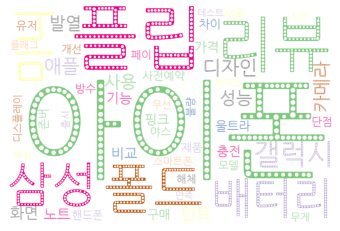

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wordcloud = WordCloud(font_path = font, background_color='white',colormap = "Accent_r", 
                      width=3000, height=2000).generate_from_frequencies(weightdict)

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()